In [7]:
#importing necessory librery
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os

K = keras.backend

In [2]:
# # generating 3D dataset
# np.random.seed(4)

# def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
#     angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
#     data = np.empty((m, 3))
#     data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
#     data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
#     data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
#     return data

# X_train = generate_3d_data(60)


# np.random.seed(4)

def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
    return data

X_train = generate_3d_data(60)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

Auto Encoder for Dimensionlity Reduction

In [3]:
np.random.seed(42)
tf.random.set_seed(42)

In [7]:
encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])
autoencoder = keras.models.Sequential([encoder, decoder])

autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1.5))

In [8]:
history = autoencoder.fit(X_train, X_train, epochs=20) # error

Epoch 1/20
2/2 [==============================] - 3s 9ms/step - loss: 0.2300
Epoch 2/20
2/2 [==============================] - 0s 8ms/step - loss: 0.0615
Epoch 3/20
2/2 [==============================] - 0s 4ms/step - loss: 0.0137
Epoch 4/20
2/2 [==============================] - 0s 5ms/step - loss: 0.0088
Epoch 5/20
2/2 [==============================] - 0s 6ms/step - loss: 0.0069
Epoch 6/20
2/2 [==============================] - 0s 5ms/step - loss: 0.0056
Epoch 7/20
2/2 [==============================] - 0s 6ms/step - loss: 0.0033
Epoch 8/20
2/2 [==============================] - 0s 5ms/step - loss: 0.0035
Epoch 9/20
2/2 [==============================] - 0s 5ms/step - loss: 0.0031
Epoch 10/20
2/2 [==============================] - 0s 5ms/step - loss: 0.0031
Epoch 11/20
2/2 [==============================] - 0s 8ms/step - loss: 0.0025
Epoch 12/20
2/2 [==============================] - 0s 5ms/step - loss: 0.0024
Epoch 13/20
2/2 [==============================] - 0s 8ms/step - loss: 0.

In [10]:
codings = autoencoder.predict(X_train)

In [ ]:
codings

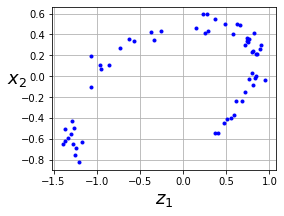

In [11]:
# ploting data with reduced dimensions
fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:,1], 'b.')
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.show()

# Stacked AutoEncoder

In [2]:
#
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [17]:
X_train_full = X_train_full.astype(np.float32) / 255

In [18]:
X_test = X_test.astype(np.float32) / 255

In [19]:
# dividing training set into trining and validation set
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

Training All Layers 

In [11]:
def rounded_accuracy(y_true, y_pred):
  return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

In [19]:
# creating auto_encoder

In [17]:
np.random.seed(42)
tf.random.set_seed(42)

In [18]:
stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='selu'),
    keras.layers.Dense(30, activation='selu')
])

stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation='selu', input_shape=[30]),
    keras.layers.Dense(28*28, activation='sigmoid'),
    keras.layers.Reshape([28,28])
])

In [19]:
stacked_ae = tf.keras.models.Sequential([stacked_encoder, stacked_decoder])
stacked_ae.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.SGD(lr=1.5), metrics=[rounded_accuracy])

In [20]:
history = stacked_ae.fit(X_train,X_train, epochs=20, validation_data=(X_valid, X_valid))

Epoch 1/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3814 - rounded_accuracy: 0.8487 - val_loss: 0.3171 - val_rounded_accuracy: 0.8995
Epoch 2/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3083 - rounded_accuracy: 0.9126 - val_loss: 0.3020 - val_rounded_accuracy: 0.9201
Epoch 3/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2997 - rounded_accuracy: 0.9203 - val_loss: 0.2986 - val_rounded_accuracy: 0.9198
Epoch 4/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2959 - rounded_accuracy: 0.9240 - val_loss: 0.2937 - val_rounded_accuracy: 0.9285
Epoch 5/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2928 - rounded_accuracy: 0.9269 - val_loss: 0.2920 - val_rounded_accuracy: 0.9284
Epoch 6/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2920 - rounded_accuracy: 0.9283 - val_loss: 0.2914 - val_rounded_accuracy: 0.9306
Epoch 7/20
1719/1719 [==================

In [22]:
def show_reconstruction(model, images=X_valid, n_images=5):
  reconstruction = model.predict(images[:n_images])
  fig = plt.figure(figsize=(n_images*1.5, 3))
  for image_index in range(n_images):
    plt.subplot(2, n_images, image_index +1)
    plt.imshow(images[image_index], cmap='binary')
    plt.subplot(2, n_images, n_images + image_index +1)
    plt.imshow(reconstruction[image_index], cmap='binary')

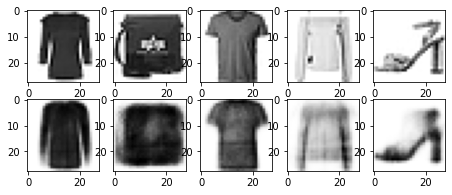

In [22]:
show_reconstruction(stacked_ae)

Visulizing fashion_mnist

In [23]:
np.random.seed(42)

from sklearn.manifold import TSNE

tsne = TSNE()



In [24]:
X_valid_compressed = stacked_encoder.predict(X_valid)

In [25]:
X_valid_2d = tsne.fit_transform(X_valid_compressed)

In [26]:
X_valid_2d = (X_valid_2d - X_valid_2d.min()) / (X_valid_2d.max() - X_valid_2d.min())

(-0.05, 1.05, 0.050462390482425686, 0.9286048457026481)

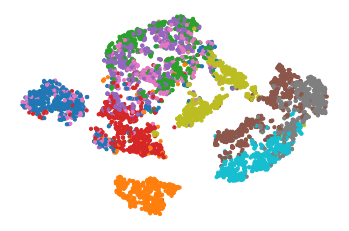

In [27]:
# ploting 
plt.scatter(X_valid_2d[:,0], X_valid_2d[:,1], c=y_valid, cmap='tab10', s=10)
plt.axis("off")

In [28]:
import matplotlib as mpl

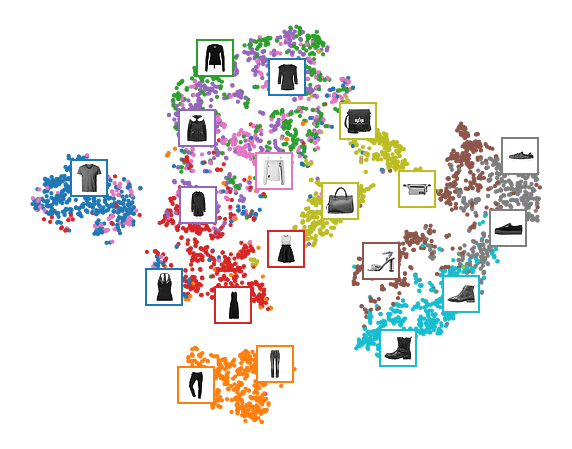

In [29]:
## Let's make graph more prettier (optional)
# adapted from https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html
plt.figure(figsize=(10, 8))
cmap = plt.cm.tab10
plt.scatter(X_valid_2d[:, 0], X_valid_2d[:, 1], c=y_valid, s=10, cmap=cmap)
image_positions = np.array([[1., 1.]])
for index, position in enumerate(X_valid_2d):
    dist = np.sum((position - image_positions) ** 2, axis=1)
    if np.min(dist) > 0.02: # if far enough from other images
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(X_valid[index], cmap="binary"),
            position, bboxprops={"edgecolor": cmap(y_valid[index]), "lw": 2})
        plt.gca().add_artist(imagebox)
plt.axis("off")
# save_fig("fashion_mnist_visualization_plot")
plt.show()

using convolutional layers instead of Dense Layers

In [30]:
tf.random.set_seed(42)
np.random.seed(42)

In [31]:
conv_encoder = keras.models.Sequential([
  keras.layers.Reshape([28,28,1], input_shape=[28,28]),
  keras.layers.Conv2D(16, kernel_size=3, padding='SAME', activation='selu'),
  keras.layers.MaxPool2D(pool_size=2),
  keras.layers.Conv2D(32, kernel_size=3, padding="SAME", activation='selu'),
  keras.layers.MaxPool2D(pool_size=2),
  keras.layers.Conv2D(64, kernel_size=3, padding='SAME', activation='selu'),
  keras.layers.MaxPool2D(pool_size=2)
])

In [32]:
conv_decoder = keras.models.Sequential([
  keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding="VALID", activation='selu', input_shape=[3,3,64]),
  keras.layers.Conv2DTranspose(14, kernel_size=16, strides=2, padding="SAME", activation='selu'),
  keras.layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding="SAME", activation='sigmoid'),
  keras.layers.Reshape([28,28])
])

In [33]:
conv_ae = keras.models.Sequential([conv_encoder, conv_decoder])

In [34]:
conv_ae.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(lr=1.0),
                metrics=[rounded_accuracy])

In [35]:
history = conv_ae.fit(X_train, X_train, epochs=5, validation_data=[X_valid, X_valid])

Epoch 1/5
1719/1719 [==============================] - 42s 8ms/step - loss: 0.3320 - rounded_accuracy: 0.8950 - val_loss: 0.0000e+00 - val_rounded_accuracy: 0.0000e+00
Epoch 2/5
1719/1719 [==============================] - 13s 8ms/step - loss: 0.2775 - rounded_accuracy: 0.9399 - val_loss: 0.0000e+00 - val_rounded_accuracy: 0.0000e+00
Epoch 3/5
1719/1719 [==============================] - 13s 8ms/step - loss: 0.2715 - rounded_accuracy: 0.9455 - val_loss: 0.0000e+00 - val_rounded_accuracy: 0.0000e+00
Epoch 4/5
1719/1719 [==============================] - 13s 8ms/step - loss: 0.2690 - rounded_accuracy: 0.9482 - val_loss: 0.0000e+00 - val_rounded_accuracy: 0.0000e+00
Epoch 5/5
1719/1719 [==============================] - 13s 8ms/step - loss: 0.2669 - rounded_accuracy: 0.9504 - val_loss: 0.0000e+00 - val_rounded_accuracy: 0.0000e+00


In [37]:
conv_encoder.summary()
conv_decoder.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)         

In [38]:
conv_ae.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_9 (Sequential)    (None, 3, 3, 64)          23296     
_________________________________________________________________
sequential_10 (Sequential)   (None, 28, 28)            133293    
Total params: 156,589
Trainable params: 156,589
Non-trainable params: 0
_________________________________________________________________


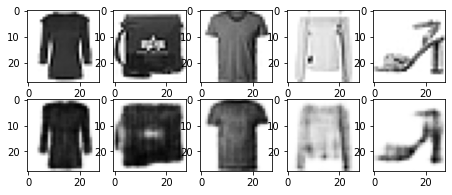

In [39]:
show_reconstruction(conv_ae)
plt.show()

Recurrent AutoEncoder

In [40]:
recurrent_encoder = keras.models.Sequential([
  keras.layers.LSTM(100, return_sequences=True, input_shape=[28,28]),
  keras.layers.LSTM(30)
])

In [42]:
recurrent_decoder = keras.models.Sequential([
  keras.layers.RepeatVector(28, input_shape=[30]),
  keras.layers.LSTM(100, return_sequences=True),
  keras.layers.TimeDistributed(keras.layers.Dense(28, activation='sigmoid')) # error in this line
])

In [43]:
recurrent_ae = keras.models.Sequential([recurrent_encoder, recurrent_decoder])

In [44]:
recurrent_ae.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(lr=0.1), metrics=[rounded_accuracy])

In [45]:
recurrent_ae.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 53s 28ms/step - loss: 0.5590 - rounded_accuracy: 0.7098 - val_loss: 0.4362 - val_rounded_accuracy: 0.8184
Epoch 2/10
1719/1719 [==============================] - 47s 27ms/step - loss: 0.4120 - rounded_accuracy: 0.8345 - val_loss: 0.3756 - val_rounded_accuracy: 0.8649
Epoch 3/10
1719/1719 [==============================] - 47s 27ms/step - loss: 0.3669 - rounded_accuracy: 0.8698 - val_loss: 0.3657 - val_rounded_accuracy: 0.8706
Epoch 4/10
1719/1719 [==============================] - 47s 27ms/step - loss: 0.3539 - rounded_accuracy: 0.8792 - val_loss: 0.3452 - val_rounded_accuracy: 0.8851
Epoch 5/10
1719/1719 [==============================] - 47s 27ms/step - loss: 0.3432 - rounded_accuracy: 0.8862 - val_loss: 0.3378 - val_rounded_accuracy: 0.8899
Epoch 6/10
1719/1719 [==============================] - 47s 27ms/step - loss: 0.3370 - rounded_accuracy: 0.8908 - val_loss: 0.3343 - val_rounded_accuracy: 0.8912
Epoch 7/10
1719/1719 [======

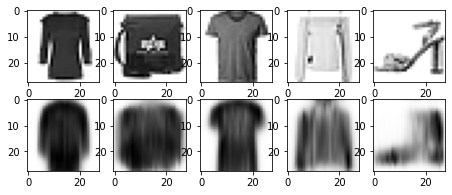

In [46]:
# showing images
show_reconstruction(recurrent_ae)
plt.show()

Stacked Denoiseing AutoEncoder

In [47]:
# setting random seed
tf.random.set_seed(42)
np.random.seed(42)

# creating autoencoder
denoising_encoder = keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=[28,28]),
  tf.keras.layers.GaussianNoise(0.2),
  tf.keras.layers.Dense(100, activation='selu'),
  tf.keras.layers.Dense(30, activation='selu')
])

In [48]:
denoising_decoder = keras.models.Sequential([
  tf.keras.layers.Dense(100, activation='selu', input_shape=[30]),
  tf.keras.layers.Dense(28*28, activation='sigmoid'),
  tf.keras.layers.Reshape([28,28])
])

In [49]:
denoising_ae = keras.models.Sequential([ denoising_encoder, denoising_decoder ])

In [50]:
denoising_ae.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(lr=1.0), metrics=[rounded_accuracy])

In [51]:
history = denoising_ae.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4007 - rounded_accuracy: 0.8323 - val_loss: 0.3182 - val_rounded_accuracy: 0.9036
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3146 - rounded_accuracy: 0.9075 - val_loss: 0.3087 - val_rounded_accuracy: 0.9156
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3067 - rounded_accuracy: 0.9140 - val_loss: 0.3035 - val_rounded_accuracy: 0.9191
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3032 - rounded_accuracy: 0.9173 - val_loss: 0.2999 - val_rounded_accuracy: 0.9207
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2998 - rounded_accuracy: 0.9205 - val_loss: 0.2968 - val_rounded_accuracy: 0.9252
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2985 - rounded_accuracy: 0.9222 - val_loss: 0.2947 - val_rounded_accuracy: 0.9272
Epoch 7/10
1719/1719 [==================

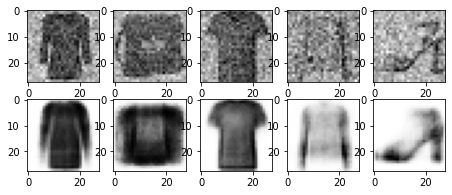

In [56]:
tf.random.set_seed(42)
np.random.seed(42)

noise = keras.layers.GaussianNoise(0.2)

show_reconstruction(denoising_ae, noise(X_valid, training=True))
plt.show()


<h1>Using Dropout</h1>

In [60]:
tf.random.set_seed(42)
np.random.seed(42)

dropout_encoder = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28,28]),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(100, activation='selu'),
  keras.layers.Dense(30, activation='selu')
])

dropout_decoder = keras.models.Sequential([
  keras.layers.Dense(100, input_shape=[30], activation='selu'),
  keras.layers.Dense(28*28, activation='sigmoid'),
  keras.layers.Reshape([28,28])
])

dropout_ae = keras.models.Sequential([dropout_encoder, dropout_decoder])

dropout_ae.compile(loss='binary_crossentropy', metrics=[rounded_accuracy], optimizer=keras.optimizers.SGD(lr=0.1))


In [62]:
history = dropout_ae.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3755 - rounded_accuracy: 0.8542 - val_loss: 0.3660 - val_rounded_accuracy: 0.8646
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3616 - rounded_accuracy: 0.8684 - val_loss: 0.3547 - val_rounded_accuracy: 0.8767
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3502 - rounded_accuracy: 0.8787 - val_loss: 0.3424 - val_rounded_accuracy: 0.8878
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3396 - rounded_accuracy: 0.8874 - val_loss: 0.3327 - val_rounded_accuracy: 0.8958
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3323 - rounded_accuracy: 0.8930 - val_loss: 0.3267 - val_rounded_accuracy: 0.8997
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3279 - rounded_accuracy: 0.8962 - val_loss: 0.3231 - val_rounded_accuracy: 0.9024
Epoch 7/10
1719/1719 [==================

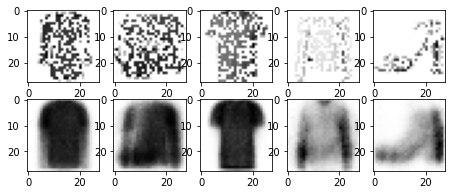

In [63]:
tf.random.set_seed(42)
np.random.seed(42)

dropout = keras.layers.Dropout(0.5)

show_reconstruction(dropout_ae, dropout(X_valid, training=True))

Variational Autoencoder

In [9]:
class Sampling(keras.layers.Layer):
  def call(self, inputs):
    mean, log_var = inputs
    return K.random_normal(tf.shape(log_var)) * K.exp(log_var / 2) + mean

In [24]:
tf.random.set_seed(42)
np.random.seed(42)

codings_size = 10

inputs = keras.layers.Input(shape=[28,28])
z = keras.layers.Flatten()(inputs)
z = keras.layers.Dense(150, activation='selu')(z)
z = keras.layers.Dense(100, activation='selu')(z)

codings_mean = keras.layers.Dense(codings_size)(z)
codings_log_var = keras.layers.Dense(codings_size)(z)
codings = Sampling()([codings_mean, codings_log_var])
variational_encoder = keras.models.Model(
    inputs=[inputs], outputs=[codings_mean, codings_log_var, codings])

decoder_inputs = keras.layers.Input(shape=[codings_size])
X = keras.layers.Dense(100, activation='selu')(decoder_inputs)
X = keras.layers.Dense(150, activation='selu')(X)
X = keras.layers.Dense(28*28, activation='sigmoid')(X)
outputs = keras.layers.Reshape([28,28])(X)

variational_decoder = keras.models.Model(inputs=[decoder_inputs], outputs=[outputs])

_, _, codings = variational_encoder(inputs)
reconstructions = variational_decoder(codings)
variational_ae = keras.models.Model(inputs=[inputs], outputs=[reconstructions])


latent_loss = -0.5 * K.sum(
    1 + codings_log_var - K.exp(codings_log_var - K.square(codings_mean)), axis=-1
)

variational_ae.add_loss(K.mean(latent_loss) / 784.0)
variational_ae.compile(loss='binary_crossentropy', optimizer ='rmsprop', metrics=[rounded_accuracy])


In [32]:
import tensorflow as tf

In [34]:
from tensorflow.keras.callbacks import CSVLogger

In [35]:
mycsvlogger = CSVLogger('vae_logs.csv')

In [36]:
history = variational_ae.fit(X_train, X_train, epochs=25, batch_size=128, 
                            validation_data=(X_valid, X_valid),
                             callbacks=[mycsvlogger])

Epoch 1/25
430/430 [==============================] - 2s 5ms/step - loss: 0.3981 - rounded_accuracy: 0.9170 - val_loss: 0.2340 - val_rounded_accuracy: 0.9146
Epoch 2/25
430/430 [==============================] - 2s 5ms/step - loss: 0.2619 - rounded_accuracy: 0.9162 - val_loss: 0.2318 - val_rounded_accuracy: 0.9166
Epoch 3/25
430/430 [==============================] - 2s 5ms/step - loss: 3.7904 - rounded_accuracy: 0.9165 - val_loss: 0.2402 - val_rounded_accuracy: 0.9152
Epoch 4/25
430/430 [==============================] - 2s 5ms/step - loss: 0.6301 - rounded_accuracy: 0.9164 - val_loss: 0.2314 - val_rounded_accuracy: 0.9150
Epoch 5/25
430/430 [==============================] - 2s 5ms/step - loss: 1.3612 - rounded_accuracy: 0.9170 - val_loss: 0.2390 - val_rounded_accuracy: 0.9142
Epoch 6/25
430/430 [==============================] - 2s 5ms/step - loss: 1.1199 - rounded_accuracy: 0.9177 - val_loss: 0.2383 - val_rounded_accuracy: 0.9156
Epoch 7/25
430/430 [==============================] 

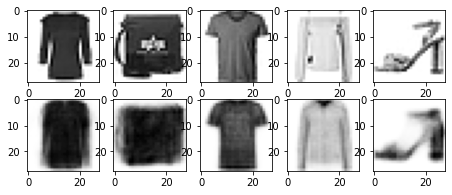

In [30]:
show_reconstruction(variational_ae)